# Evaluation Project -3

# HR Analytics Project- Understanding the Attrition in HR

In [1]:
# Importing all libraries

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Getting the csv file extracted from zip file

In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# EDA

In [7]:
df.shape

(1470, 35)

we have 1470 rows and 35 columns.This means we have 34 feature variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# to get full view on dataset

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Checking Null Values

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

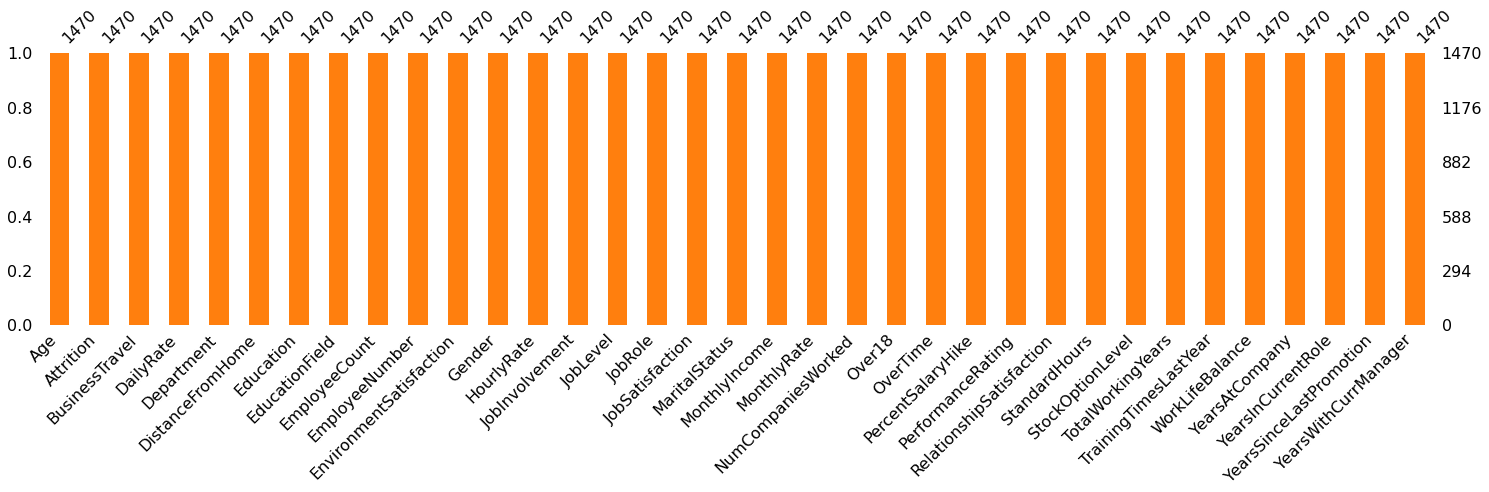

In [12]:
msno.bar(df,color="tab:orange",figsize = (25,5))

We have no null/ missing values in our data set as we can see in visualizations also

# Checking duplicates

In [13]:
df.duplicated().sum()

0

Hence we have no duplicate values

# Descriptive Statistics

In [14]:
df.describe().T   # as we have too many columns we have done transpose

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

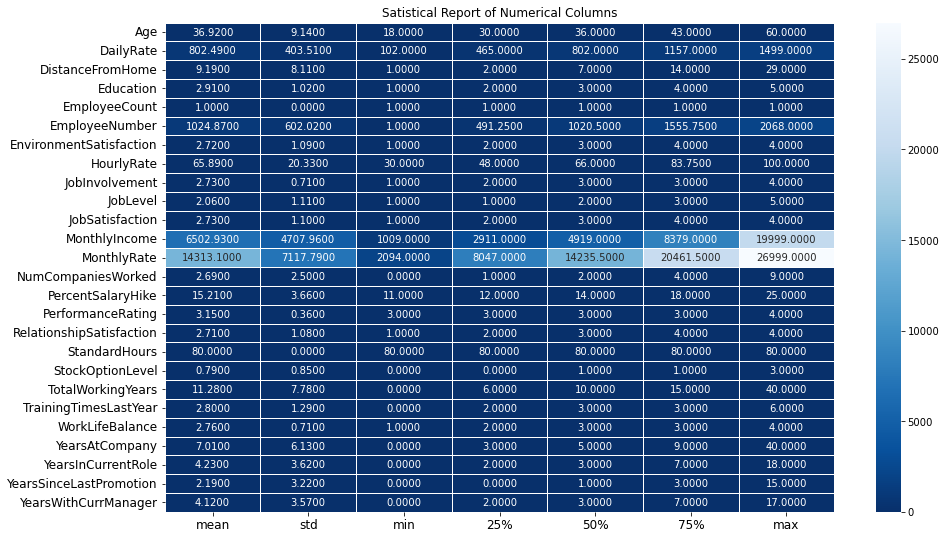

In [15]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 0.5, annot= True, fmt = ".4f", cmap="Blues_r")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

The data points where the color is light shows have highest values

In [16]:
#Hence we will drop some columns we mentioned above because they do not have any effect on attribution value
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1, inplace = True)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [17]:
df.shape

(1470, 31)

Now we have 30 feature variable instead of 34 and 1 target varible, and 1470 columns like before

# Checking Unique Values:

In [18]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

seperating object data type columns 

In [19]:
object_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_d.append(x)
object_d

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# checking value counts

In [20]:
for i in object_d:
    print(i)
    print(df[i].value_counts())
    print('*'*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
****************************************************************************************************
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
****************************************************************************************************
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
****************************************************************************************************
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
****************************************************************************************************
Gender
Male      882
Female    588
Name: Gender, dtype: int64
****************

In [21]:
int_d = []        # columns having integer datatype
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        int_d.append(x)
int_d

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Visualization:


• Univariate Analysis

• Count Plot

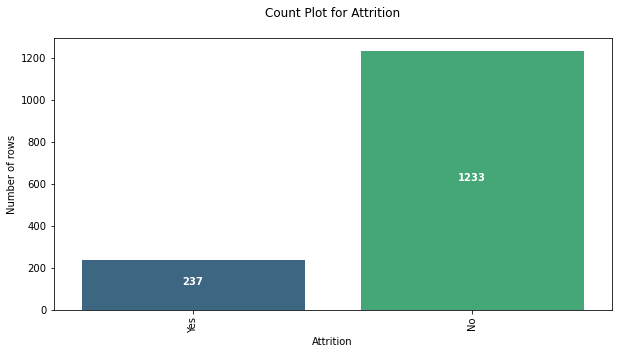

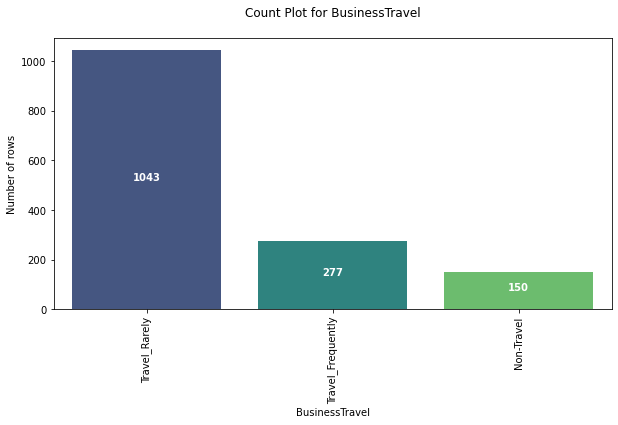

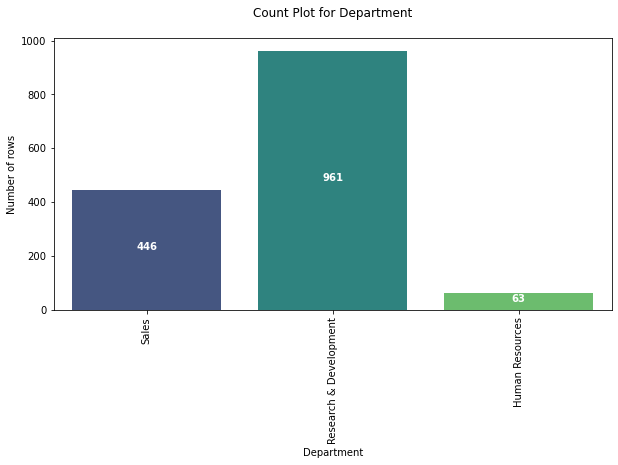

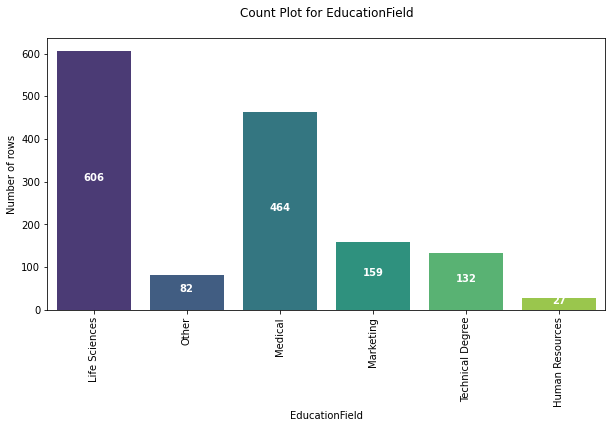

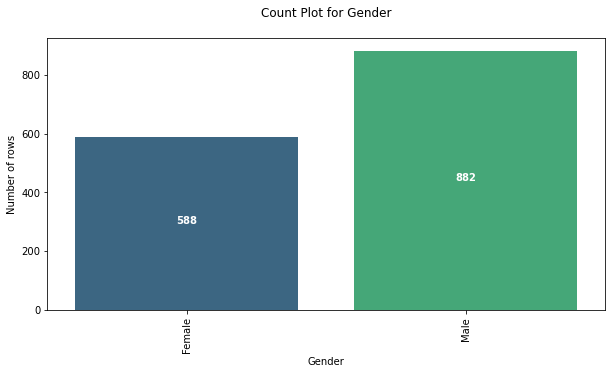

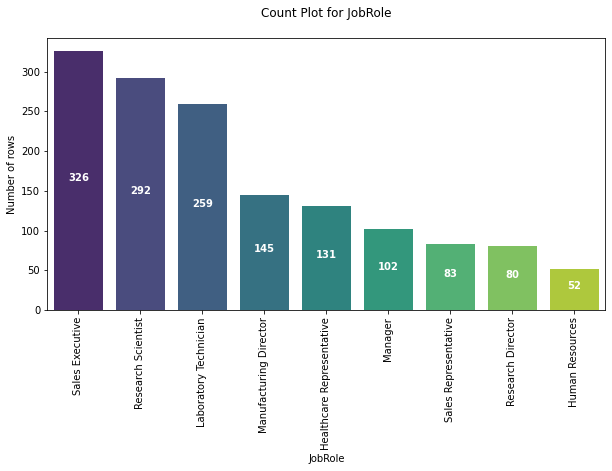

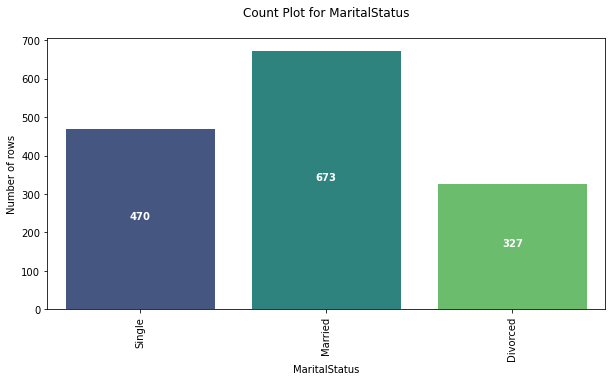

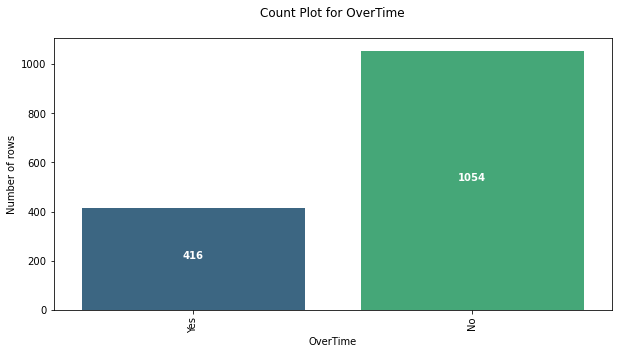

In [22]:
col_name = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for m in col_name:
    plt.figure(figsize=(10,5))
    values = df[m].value_counts()
    index = 0
    ax = sns.countplot(df[m], palette="viridis")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {m}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()

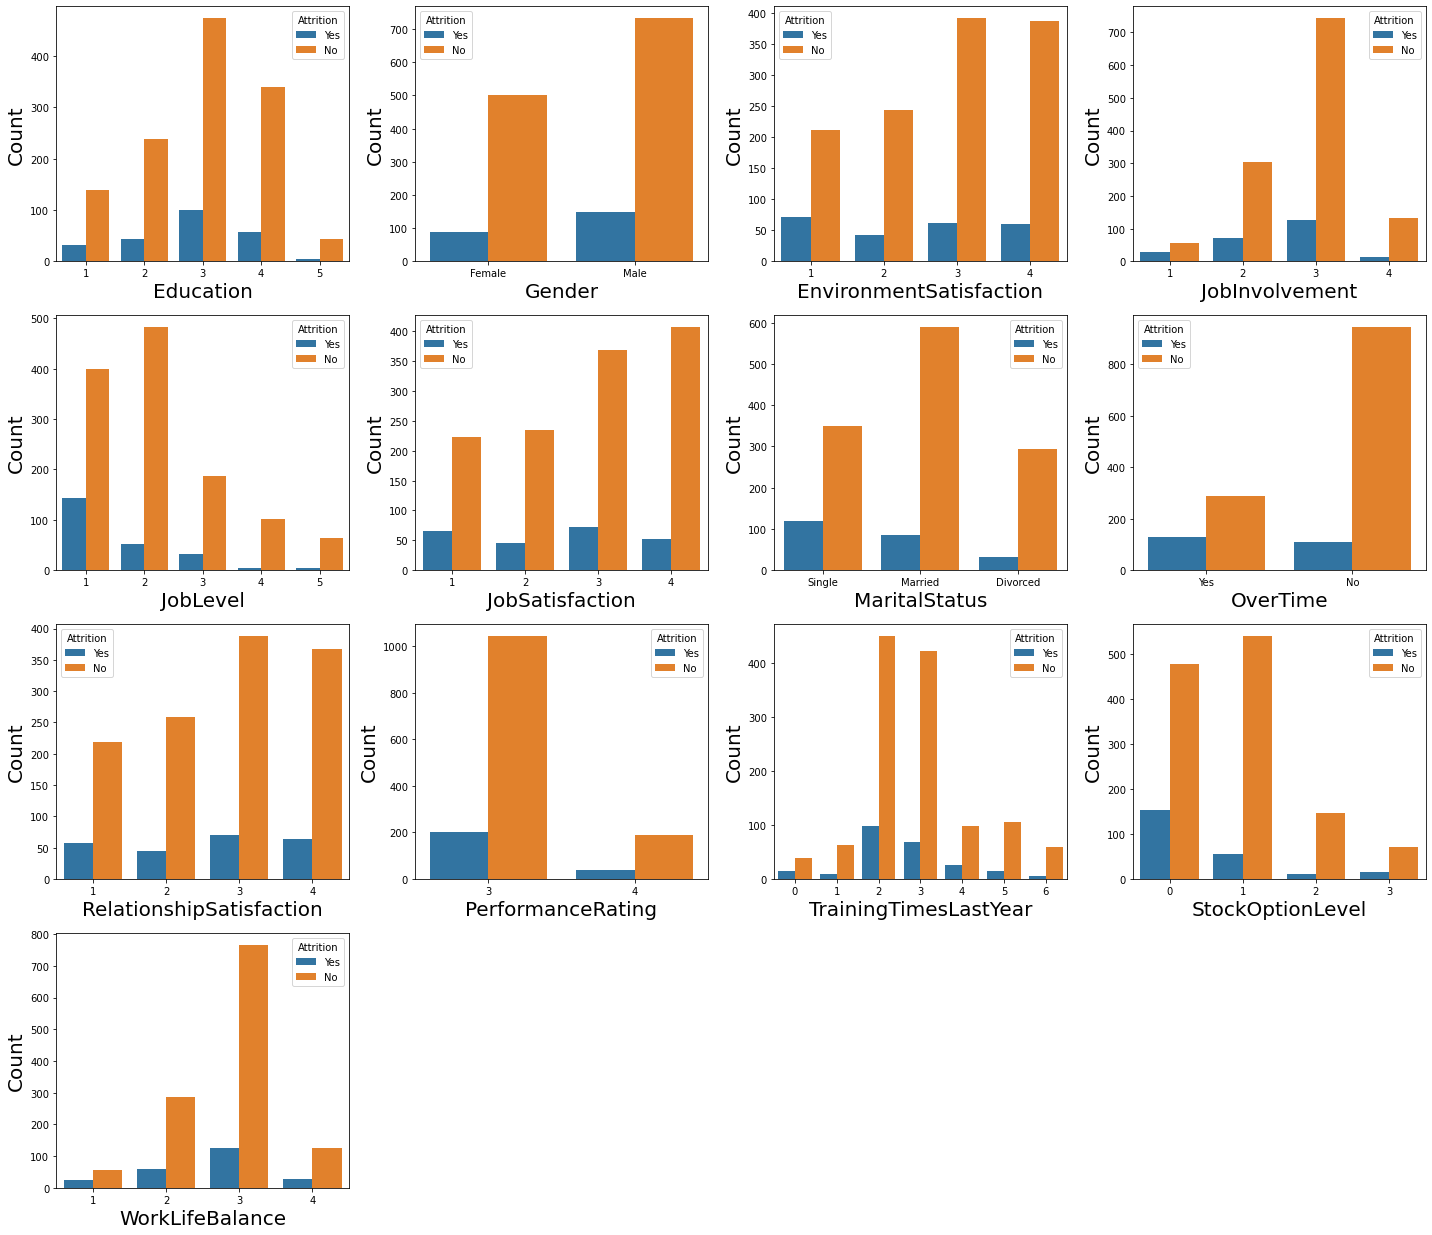

In [23]:
plt.figure(figsize=(20,21),facecolor='white')
index=1
a = df[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance']]
b = df['Attrition']
for col in a:
    if index<=23:
        plt.subplot(5,4,index)
        sns.countplot(a[col],hue =b)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    index+=1
plt.tight_layout()

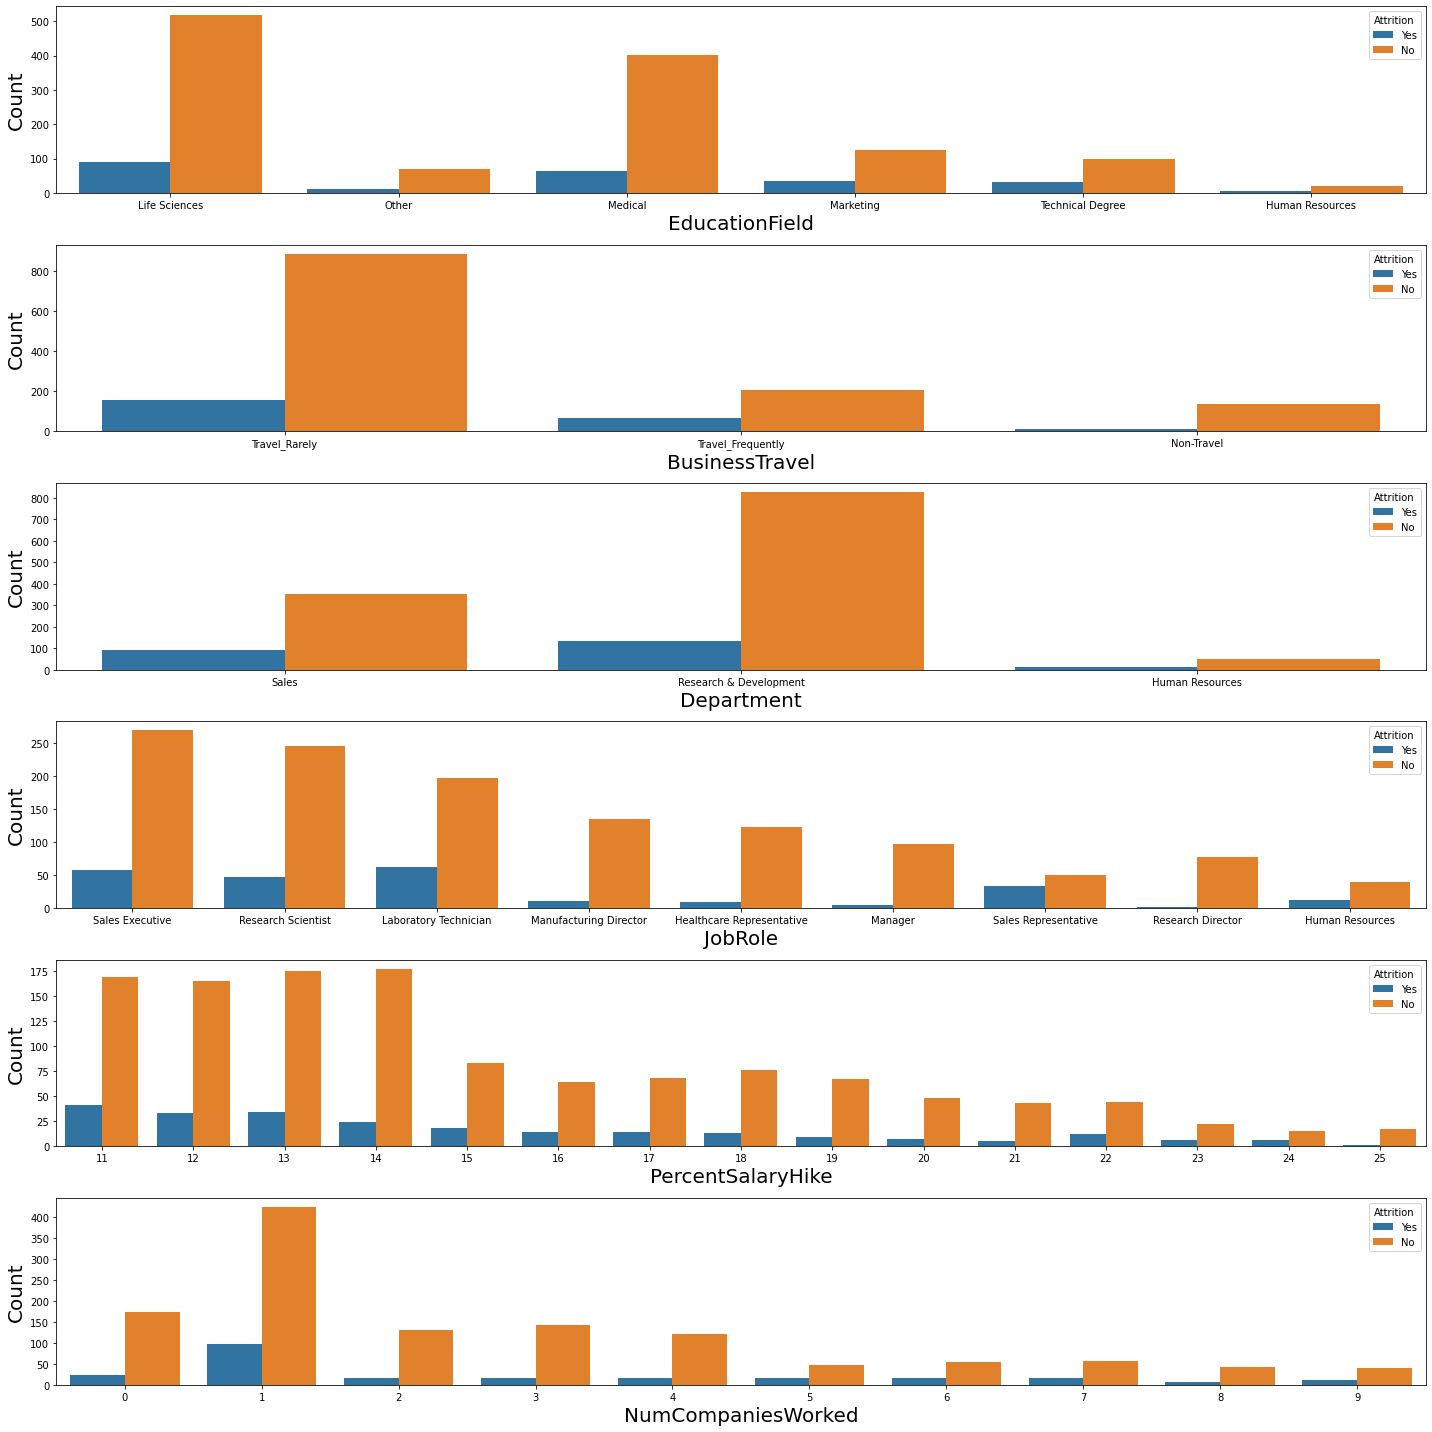

In [24]:
plt.figure(figsize=(20,20),facecolor='white')
index=1
a = df[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
b = df['Attrition']
for col in a:
    if index<=23:
        plt.subplot(6,1,index)
        sns.countplot(a[col],hue =b)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    index+=1
plt.tight_layout()

 • Pie Chart

In [25]:
unique_val = ['Attrition', 'Gender', 'OverTime', 'PerformanceRating', 'BusinessTravel', 'Department', 
                  'MaritalStatus', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                  'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Education', 'JobLevel', 
                  'EducationField', 'TrainingTimesLastYear', 'JobRole']

****************************** Attrition ******************************


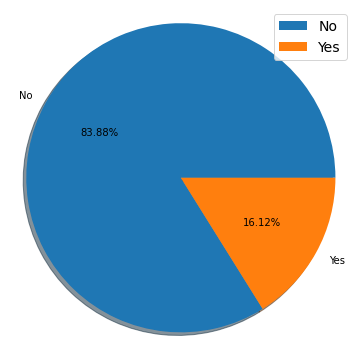

****************************** Gender ******************************


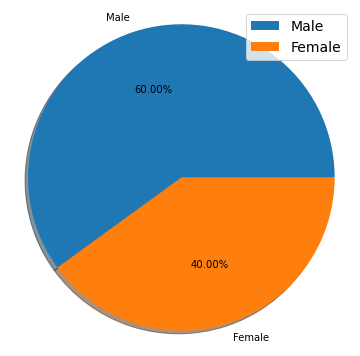

****************************** OverTime ******************************


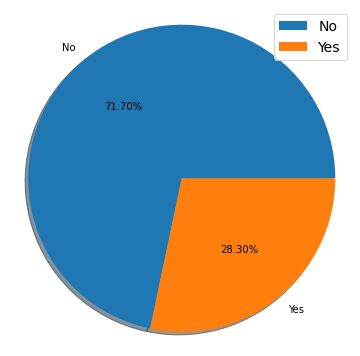

****************************** PerformanceRating ******************************


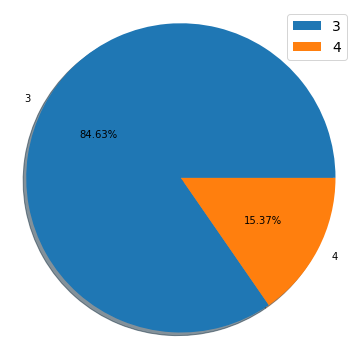

****************************** BusinessTravel ******************************


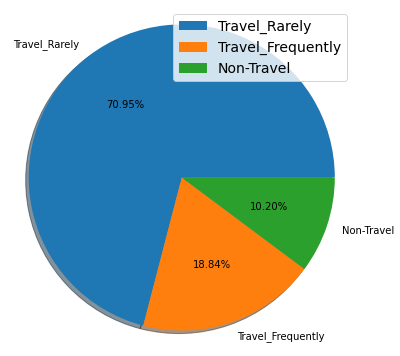

****************************** Department ******************************


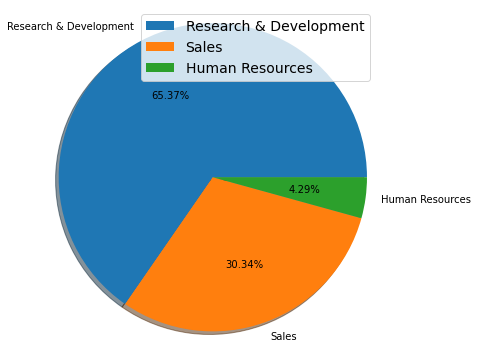

****************************** MaritalStatus ******************************


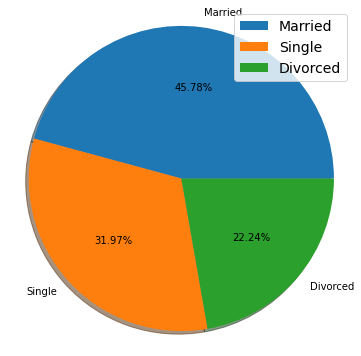

****************************** EnvironmentSatisfaction ******************************


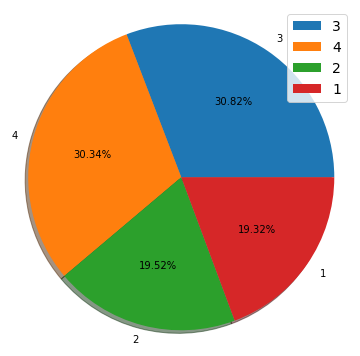

****************************** JobInvolvement ******************************


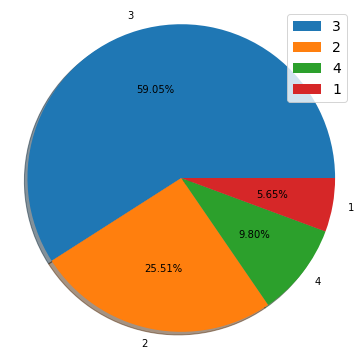

****************************** JobSatisfaction ******************************


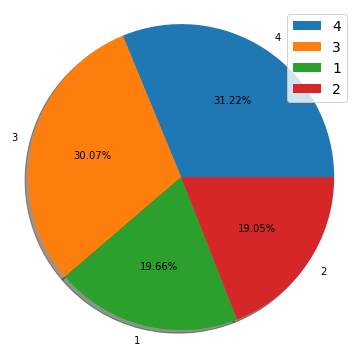

****************************** RelationshipSatisfaction ******************************


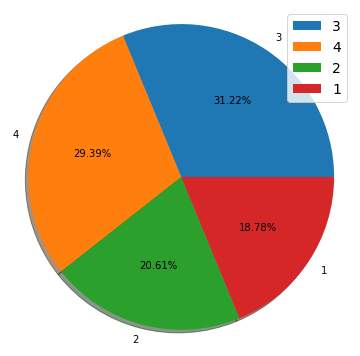

****************************** StockOptionLevel ******************************


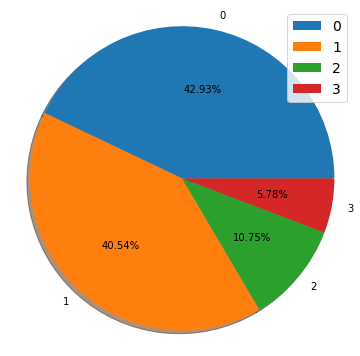

****************************** WorkLifeBalance ******************************


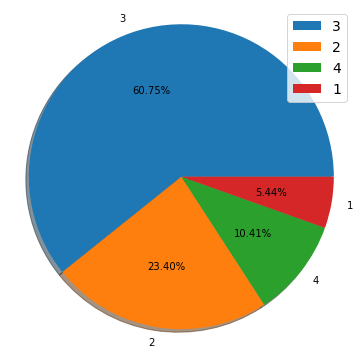

****************************** Education ******************************


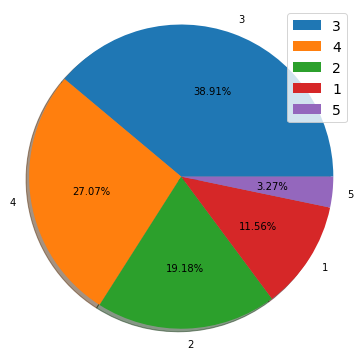

****************************** JobLevel ******************************


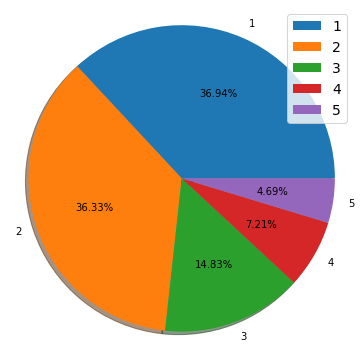

****************************** EducationField ******************************


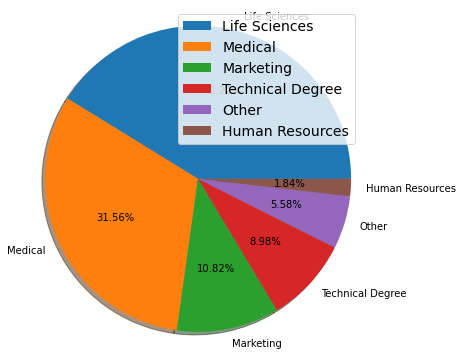

****************************** TrainingTimesLastYear ******************************


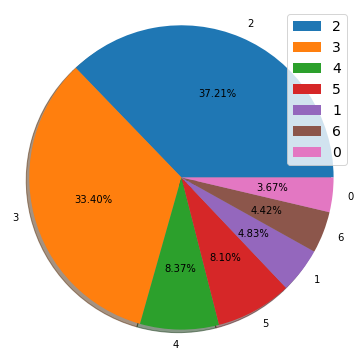

****************************** JobRole ******************************


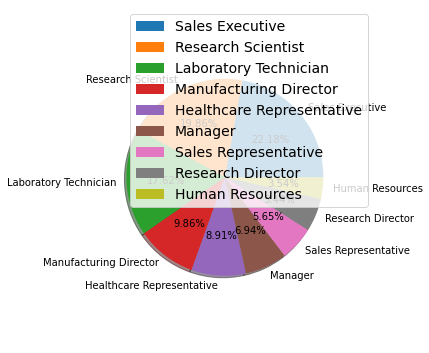

In [26]:
for i in unique_val:
    print("*"*30,i,"*"*30)
    plt.figure(figsize=(8,6))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, shadow =True,autopct='%1.2f%%')
    plt.axis('equal')
    plt.tight_layout()
    plt.legend(prop={'size':14},loc=1)
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()   

• Bivariate Analysis

• Rugplot

<AxesSubplot:xlabel='MonthlyIncome', ylabel='MonthlyRate'>

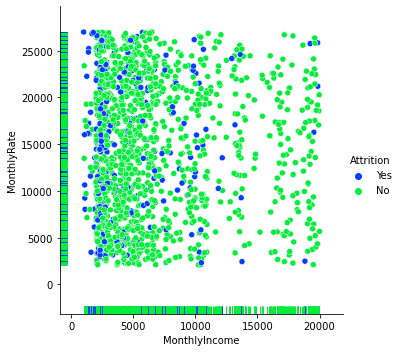

In [27]:
plt.style.use('seaborn-bright')


sns.relplot(data=df, x='MonthlyIncome', y='MonthlyRate', hue='Attrition')
sns.rugplot(data=df, x='MonthlyIncome', y='MonthlyRate', hue='Attrition', legend=False)

now lets check attrition rate compared to some feature variables

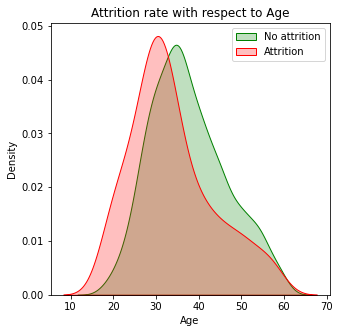

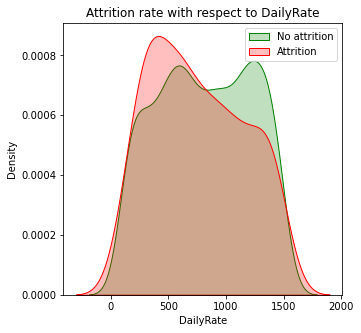

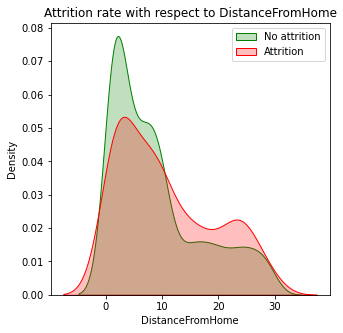

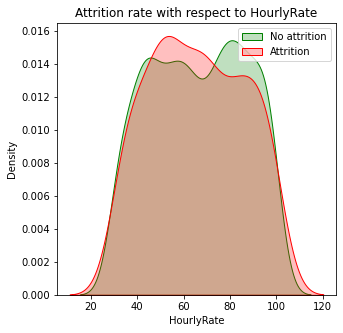

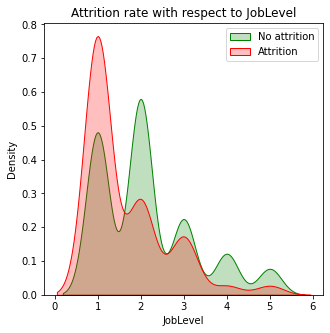

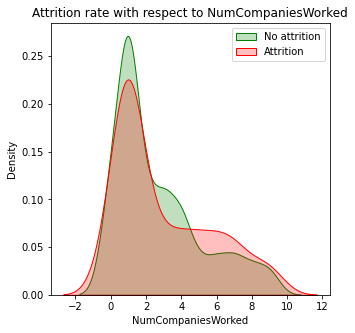

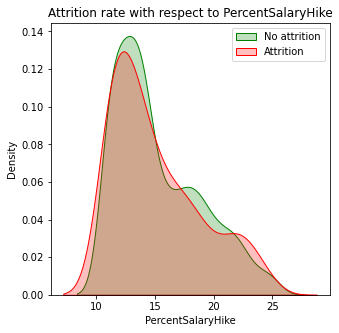

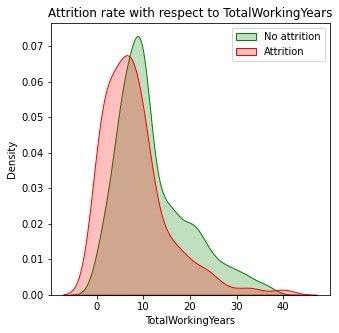

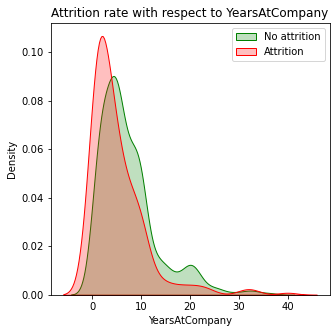

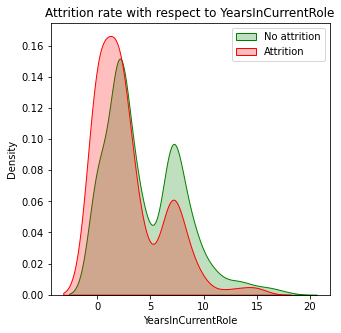

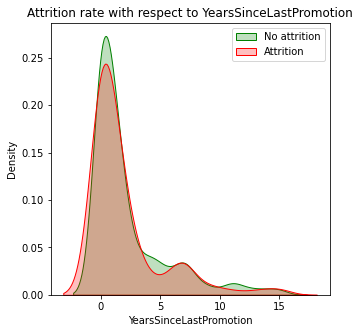

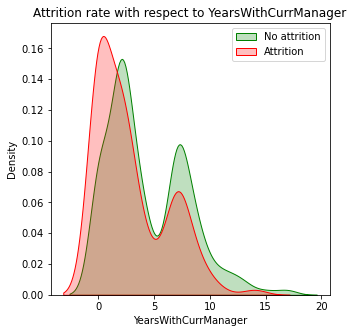

In [28]:
col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'NumCompaniesWorked', 
               'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in df[col]:
    fig = plt.figure(figsize=(5,5))
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'), i], color='g', shade=True, label='No attrition') 
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'), i], color='r', shade=True, label='Attrition')
    plt.title('Attrition rate with respect to {}'.format(i))
    plt.legend()
    plt.show()


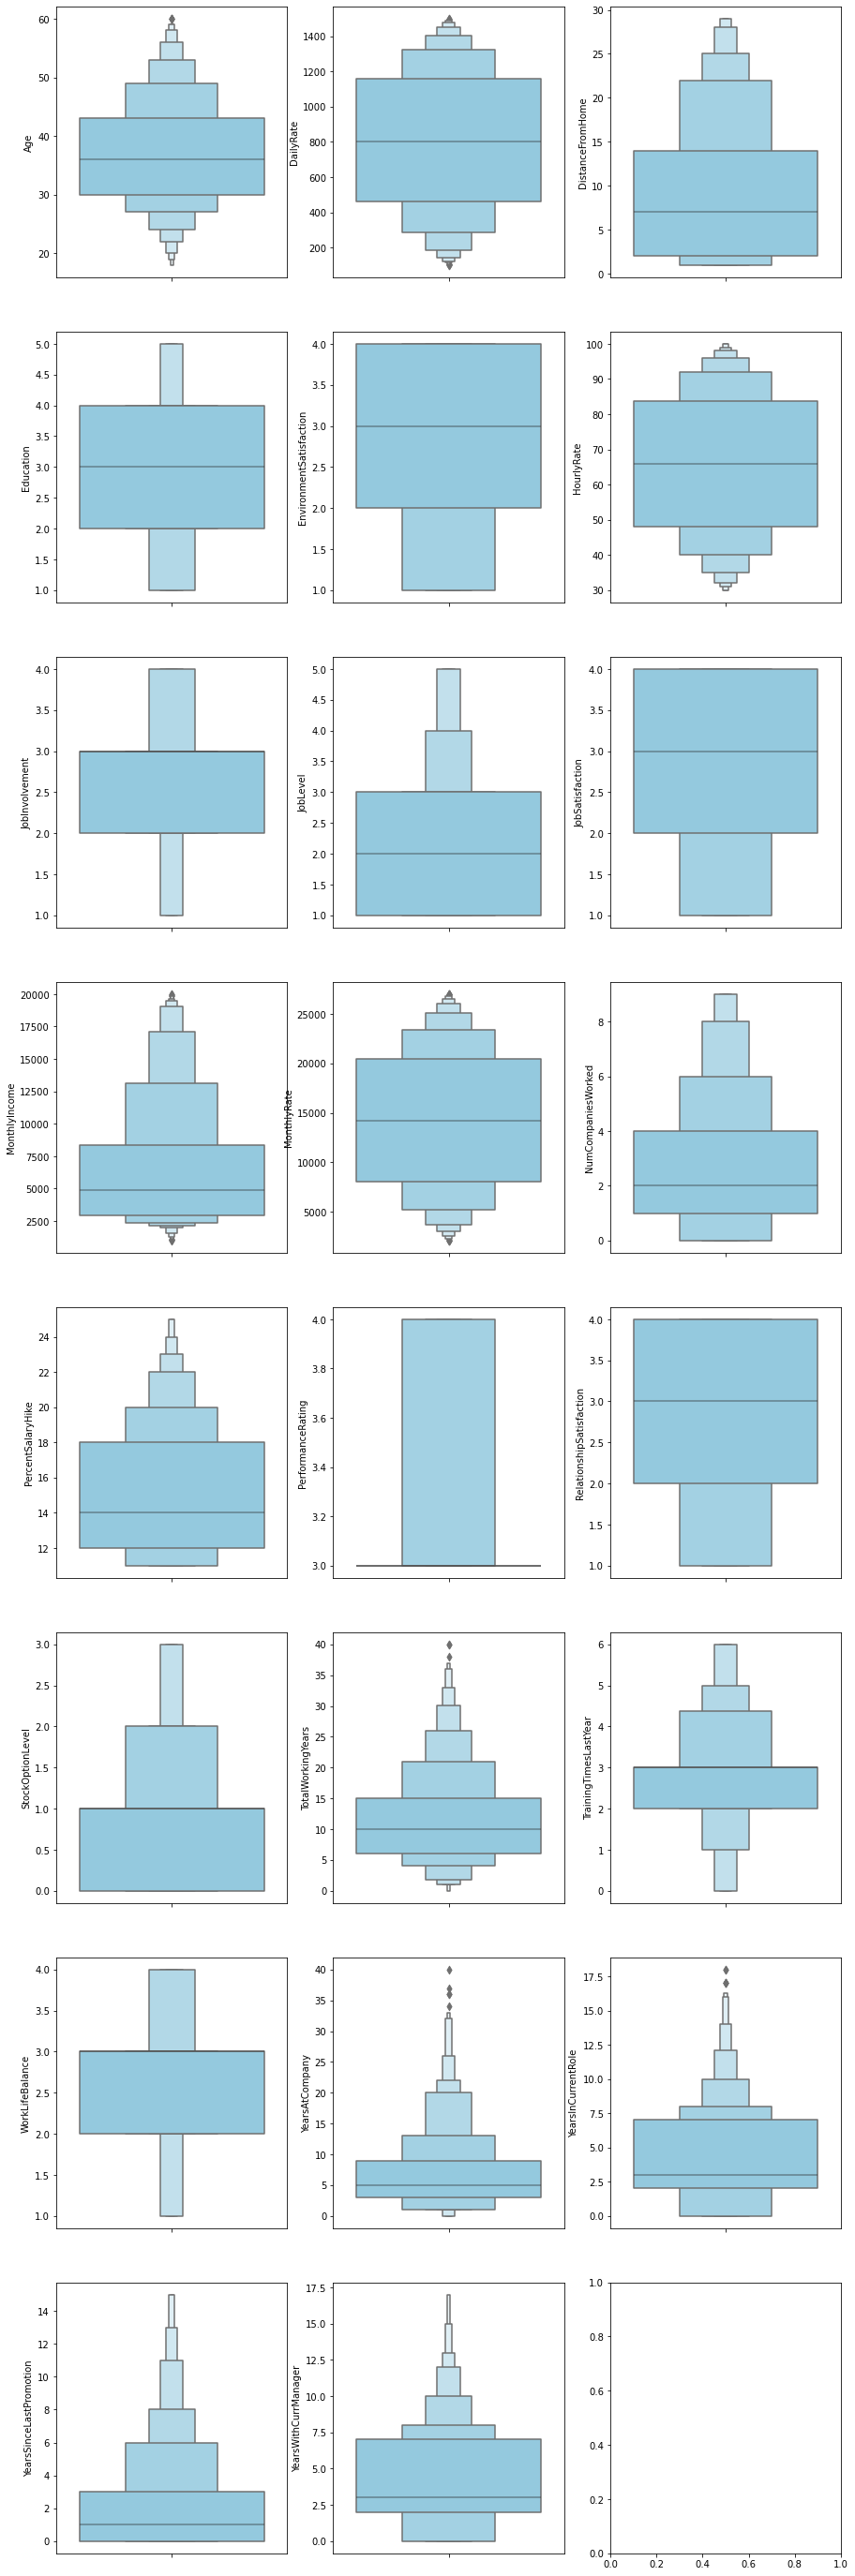

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_d].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="skyblue")
    index += 1
plt.show()

Thus we can see from above graph that there are outliers present in yearsatcompany, yearsatcurrentrole, totalworkingyears, monthly income, monthly rate, age, daily rate,stock option level,performance rating
We will treat them later.

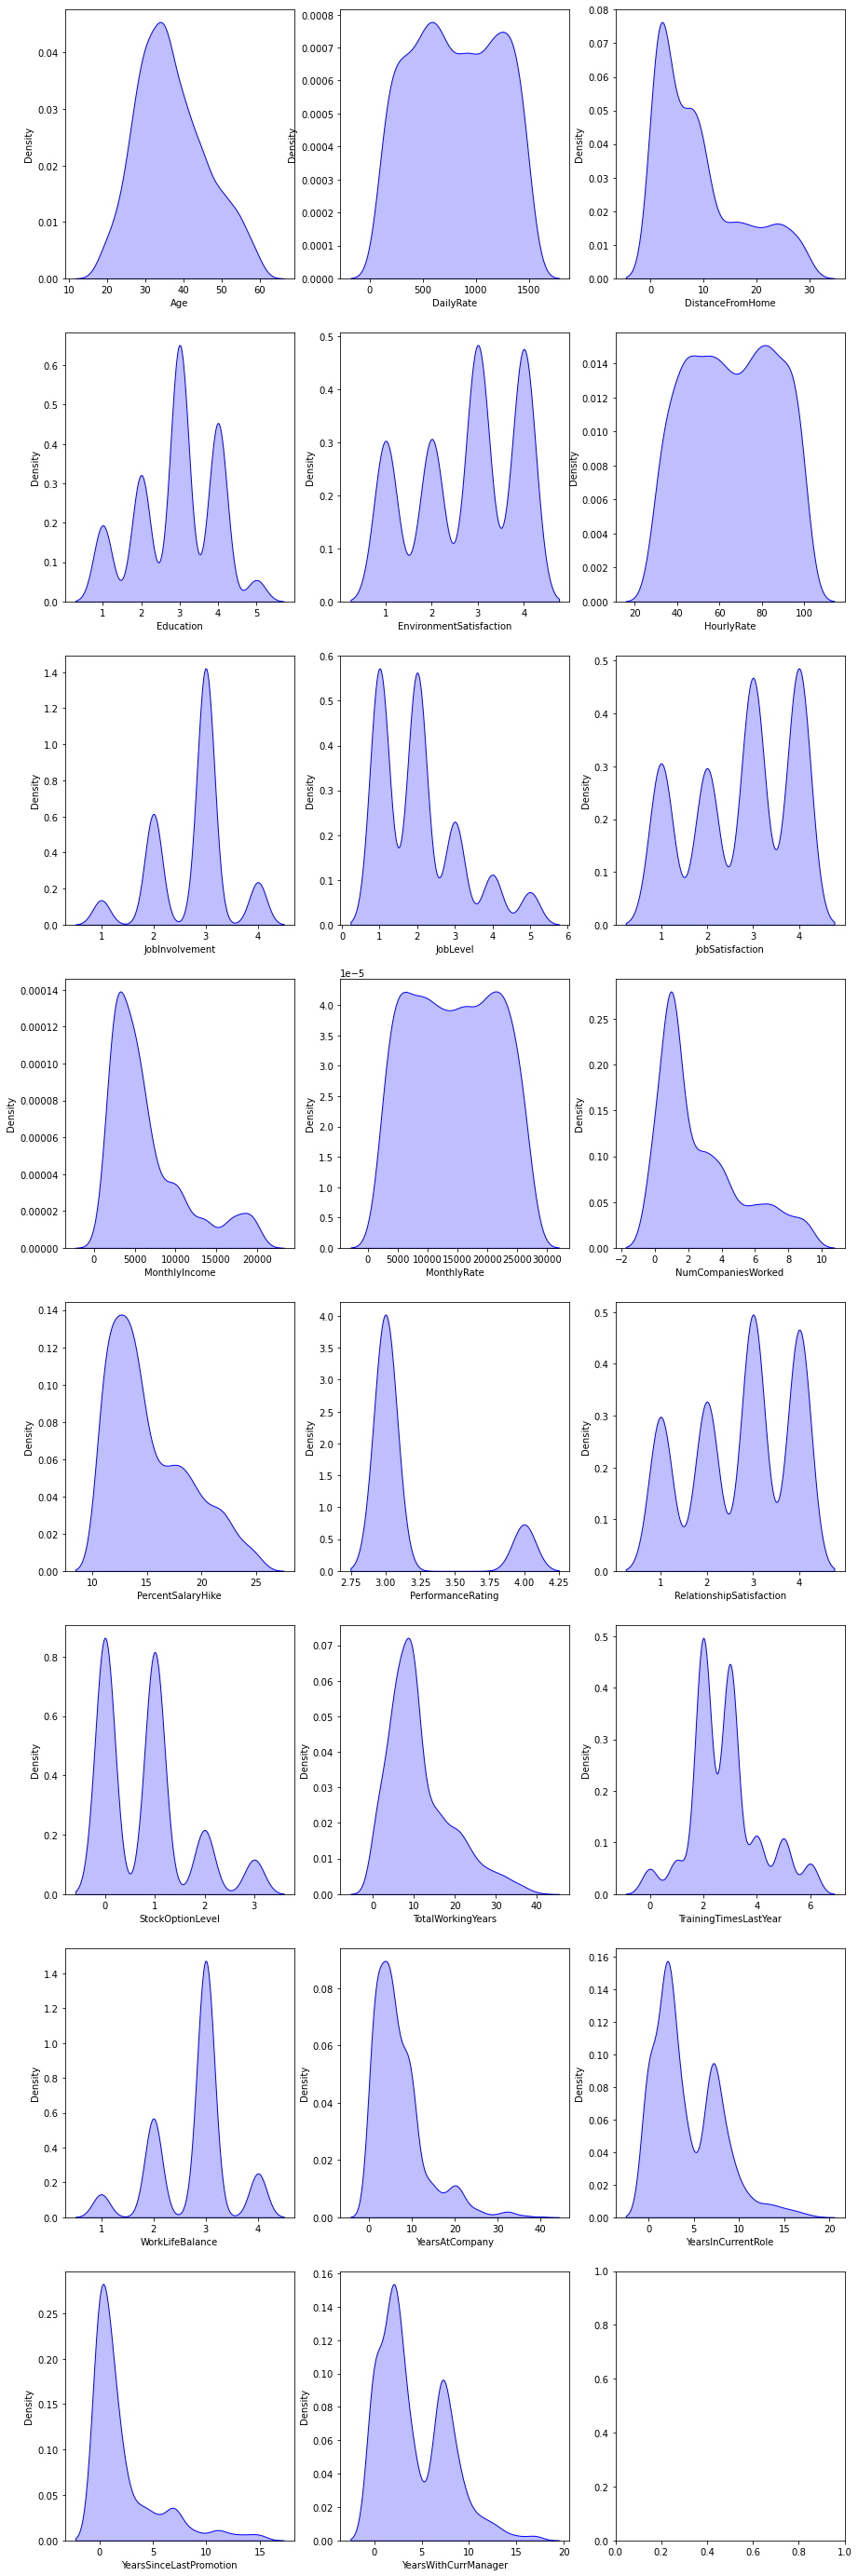

In [30]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_d].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.show()

observation:
Daily rate is bimodal
age is normally distributed
distancefromhome, monthly income, no of companies worked, percent salary hike, total working years, years at company, years since last promotion are all right skewed.
just like daily rate, hourly rate, monthly rate, perfromance rating, years in current role, years with current manager are all bimodal.


# Label encoding of classification columns:


In [31]:
object_d      # columns having categorical values

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [32]:
le = LabelEncoder()

for val in object_d:
    df[val]= le.fit_transform(df[val])

df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [33]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

Hence we have converted all categorical columns in interger data type

# Correlation:

In [34]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

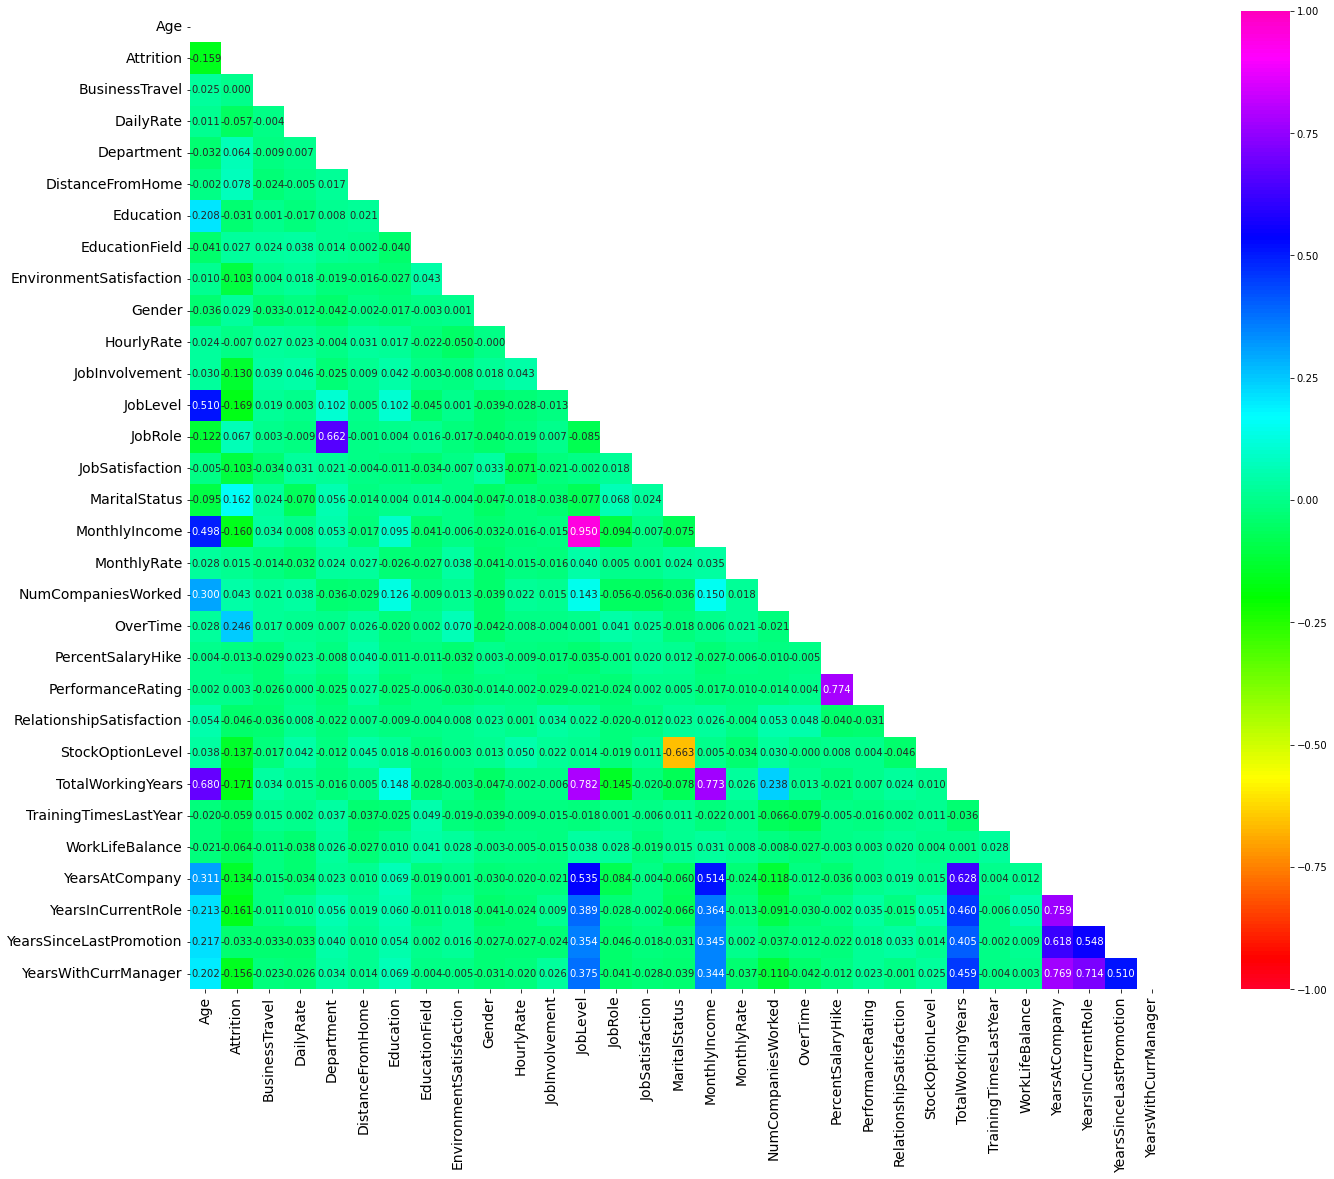

In [35]:
#Its difficult to read above chart this lets plot upper triangle

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_rainbow", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Lets plot a bar plot of correlation for more better understanding

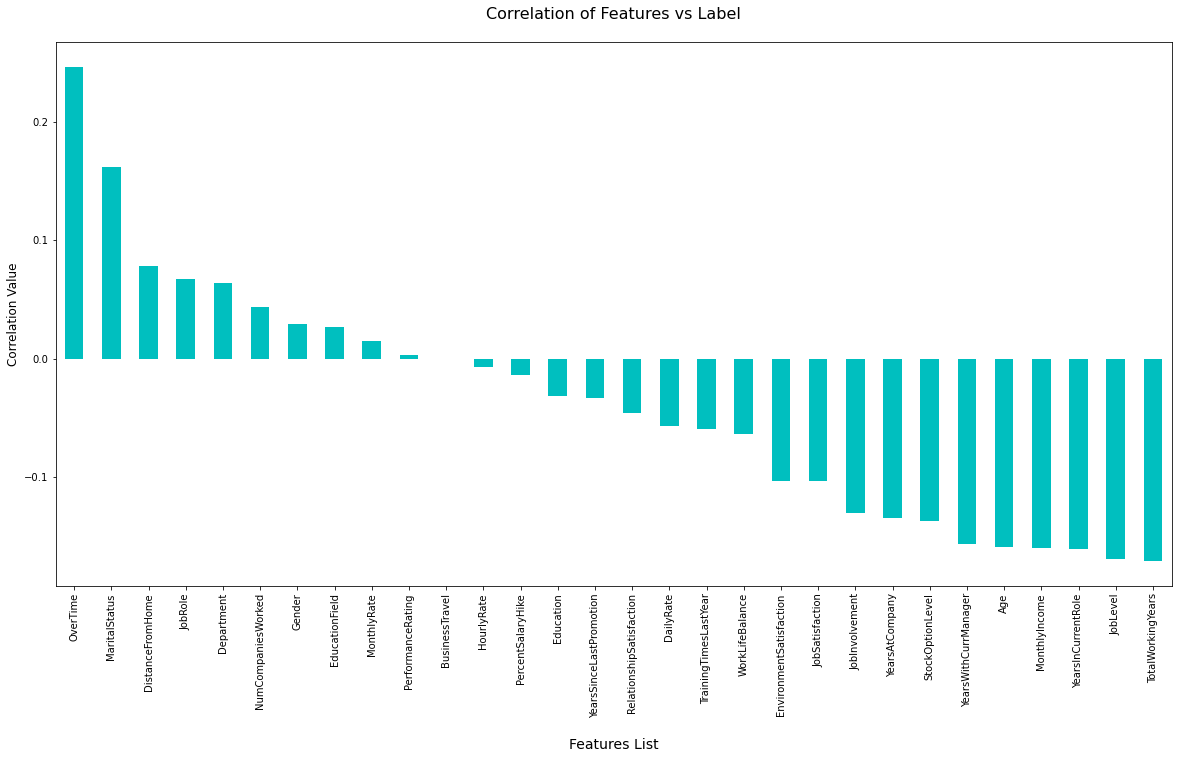

In [36]:
plt.figure(figsize=(20,10))
df.corr()['Attrition'].sort_values(ascending=False).drop('Attrition').plot(kind='bar',color='c')
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Removing Outliers:

In [37]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new.head()

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [38]:
df.shape

(1470, 31)

In [39]:
df_new.shape

(1387, 31)

In [40]:
data_loss = ((1470-1387)/1470)*100
data_loss

5.646258503401361

In zscore we loss 5.6% of data which is affordable we can proceed further.

# Splitting the dataset in feature and target column

In [41]:
x= df_new.drop('Attrition', axis=1)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               1                        3       1          61   
2               4                        4       1          92   
3               1                        4       0          56   
4               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [42]:
y = df_new['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

# Removing Skewness:
    

Lets remove skewness of our numerical data:

In [43]:
for i in int_d:
    print(i, "-----",df_new[i].skew())
   

Age ----- 0.47228001763051025
DailyRate ----- -0.01707841677985756
DistanceFromHome ----- 0.954752024521482
Education ----- -0.28902428852308676
EnvironmentSatisfaction ----- -0.325285159581498
HourlyRate ----- -0.030480902734410707
JobInvolvement ----- -0.5014010254458733
JobLevel ----- 1.1260754071533607
JobSatisfaction ----- -0.34561212898537735
MonthlyIncome ----- 1.544769534297169
MonthlyRate ----- 0.030596366027193928
NumCompaniesWorked ----- 1.0377145225829456
PercentSalaryHike ----- 0.8005919084201518
PerformanceRating ----- 1.9315657483354052
RelationshipSatisfaction ----- -0.29568613443429975
StockOptionLevel ----- 0.9623318229186772
TotalWorkingYears ----- 1.0344870658146759
TrainingTimesLastYear ----- 0.577613531132579
WorkLifeBalance ----- -0.5571001032819907
YearsAtCompany ----- 1.248622932487156
YearsInCurrentRole ----- 0.7266751703398764
YearsSinceLastPromotion ----- 1.7563345144294367
YearsWithCurrManager ----- 0.6945059504223531


lets remove skewness by log tranform

In [44]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.610133        0.638730   0.750615    1.379881         -1.489968   
1  1.371830       -1.380776  -1.343372   -0.473500          0.244561   
2  0.182486        0.638730   1.337080   -0.473500         -1.028366   
3 -0.284736       -1.380776   1.377080   -0.473500         -0.698191   
4 -1.080489        0.638730  -0.467301   -0.473500         -1.028366   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.902402       -0.965129                -0.712215 -1.229911    1.359498   
1  -1.759177       -0.965129                 0.204826  0.813067   -0.208763   
2  -0.902402        1.239552                 1.210036  0.813067    1.267832   
3   1.102042       -0.965129                 1.210036 -1.229911   -0.458919   
4  -1.759177        0.689982                -1.522916  0.813067   -1.290538   

   JobInvolvement  JobLevel   JobRole  JobSatisfaction  MaritalStatus  \
0        0.322170  0.349828  1.017588         1.186326       1.231767   
1       -1.065841  0.349828  0.596961        -0.725589      -0.142549   
2       -1.065841 -1.141761 -1.022696         0.181993       1.231767   
3        0.322170 -1.141761  0.596961         0.181993      -0.142549   
4        0.322170 -1.141761 -1.022696        -0.725589      -0.142549   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       0.386674     0.755974            1.620671  1.584737   
1       0.144235     1.410991           -0.561880 -0.631019   
2      -1.431153    -1.910035            1.273711  1.584737   
3      -0.814425     1.205093           -0.561880  1.584737   
4      -0.504453     0.391227            1.764103 -0.631019   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0          -1.495549      -1.665335e-16                 -1.524369   
1           1.690425       9.298118e-16                  1.235448   
2           0.193797      -1.665335e-16                 -0.690386   
3          -1.495549      -1.665335e-16                  0.235192   
4          -0.957525      -1.665335e-16                  1.235448   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -1.084263          -0.173231              -2.608524   
1          0.548653           0.147620               0.217074   
2         -1.084263          -0.351153               0.217074   
3         -1.084263          -0.173231               0.217074   
4          0.548653          -0.544046               0.217074   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0         -2.14795        0.231837            0.290524   
1          0.27486        0.948319            1.006575   
2          0.27486       -2.156089           -1.571814   
3          0.27486        0.621429            1.006575   
4          0.27486       -0.933983           -0.390769   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -1.073534              0.582177  
1                 0.193168              1.018073  
2                -1.073534             -1.528426  
3                 1.027520             -1.528426  
4                 0.722874             -0.347871

# Checking Multicollinearity:

In [45]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

variables  VIF FACTOR
0                        Age    1.930457
1             BusinessTravel    1.014314
2                  DailyRate    1.025841
3                 Department    2.172093
4           DistanceFromHome    1.017385
5                  Education    1.065266
6             EducationField    1.030480
7    EnvironmentSatisfaction    1.024396
8                     Gender    1.024366
9                 HourlyRate    1.024189
10            JobInvolvement    1.020167
11                  JobLevel    5.976707
12                   JobRole    2.023213
13           JobSatisfaction    1.023909
14             MaritalStatus    2.298943
15             MonthlyIncome    5.842828
16               MonthlyRate    1.022108
17        NumCompaniesWorked    1.426763
18                  OverTime    1.028400
19         PercentSalaryHike    1.016867
20         PerformanceRating    1.747581
21  RelationshipSatisfaction    1.022260
22          StockOptionLevel    2.279101
23         TotalWorkingYears    4.093506
24     TrainingTimesLastYear    1.025519
25           WorkLifeBalance    1.017093
26            YearsAtCompany    6.296064
27        YearsInCurrentRole    3.513852
28   YearsSinceLastPromotion    1.373189
29      YearsWithCurrManager    3.433437

All vif factors are below 10 so we can proceed.

# Balancing the data using SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=0,k_neighbors=1)

x,y = sm.fit_resample(x, y)

In [49]:
x.shape

(2316, 30)

In [50]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [51]:
y.shape

(2316,)

Hence we have balanced the data

# Standardization Of Data using Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.782083        0.676792   0.846825    1.332316         -1.689408   
1     1.523663       -1.431809  -1.331095   -0.531678          0.134210   
2     0.365730        0.676792   1.456797   -0.531678         -1.204098   
3    -0.089153       -1.431809   1.498400   -0.531678         -0.856964   
4    -0.863890        0.676792  -0.419908   -0.531678         -1.204098   
5    -0.209860       -1.431809   0.619886   -0.531678         -1.204098   
6     2.321782        0.676792   1.348853   -0.531678         -0.856964   
7    -0.460777        0.676792   1.423854   -0.531678          1.409986   
8     0.473144       -1.431809  -1.540835   -0.531678          1.358423   
9     0.255918        0.676792   1.293406   -0.531678          1.553390   
10    0.143589        0.676792   0.144085   -0.531678          0.924811   
11   -0.591366        0.676792  -1.766204   -0.531678          0.848940   
12   -0.333674        0.676792  -0.210478   -0.531678          1.507330   
13    0.028612        0.676792   1.397436   -0.531678          1.128731   
14   -0.725658        0.676792  -1.961703   -0.531678          1.409986   
15   -0.591366        0.676792   1.491840   -0.531678          1.248683   
16   -0.209860        0.676792  -1.157319   -0.531678         -0.363726   
17   -1.624448       -1.913700   0.895304   -0.531678          0.924811   
18    1.857701        0.676792   1.114193    1.332316         -1.204098   
19    0.473144        0.676792  -1.044348   -0.531678         -1.204098   
20   -1.305009       -1.913700  -0.202647   -0.531678          0.490373   
21    0.255918        0.676792   1.111935    1.332316          0.264373   
22    0.028612        0.676792  -0.901782   -0.531678         -0.010922   
23   -1.792996        0.676792  -0.984432   -0.531678          0.848940   
24    0.028612        0.676792  -0.135132   -0.531678         -0.174975   
25    1.857701        0.676792   1.255553   -0.531678         -0.363726   
26   -0.209860       -1.431809   0.899910   -0.531678          0.924811   
27    0.880952        0.676792  -0.155840    1.332316          0.134210   
28    1.258095        0.676792  -0.119639    1.332316         -1.204098   
29   -0.089153        0.676792   0.426270   -0.531678         -1.204098   
30    1.073039        0.676792   1.644018   -0.531678          0.382396   
31   -0.460777        0.676792  -1.873372   -0.531678          0.264373   
32    0.578273        0.676792   0.355959    1.332316         -0.363726   
33   -1.305009        0.676792   0.154057   -0.531678         -1.689408   
34    0.977911        0.676792   1.235464   -0.531678         -1.204098   
35    1.609217        0.676792   0.292448    1.332316         -0.856964   
36    0.143589        0.676792   0.343781    1.332316         -1.204098   
37    0.255918        0.676792   0.250673   -0.531678         -0.363726   
38   -0.089153       -1.431809   0.936682    1.332316         -1.689408   
39    0.143589        0.676792  -0.771699   -0.531678         -0.586094   
40   -0.863890        0.676792   1.161506   -0.531678         -1.204098   
41   -1.006327        0.676792   1.421655   -0.531678          1.459572   
42   -0.863890       -1.431809   0.593822    1.332316          0.134210   
43   -0.460777       -1.431809  -0.078481   -0.531678         -1.689408   
44    0.028612       -1.913700   0.760858    1.332316          1.358423   
45    0.365730        0.676792  -0.934086   -0.531678          1.128731   
46    1.258095       -1.431809   1.096117    1.332316         -0.363726   
47    0.143589        0.676792   1.136748   -0.531678          0.134210   
48    1.436662        0.676792  -0.326332   -0.531678         -1.689408   
49   -0.725658        0.676792   1.589877   -0.531678         -0.363726   
50    1.073039        0.676792   1.706539    1.332316         -1.689408   
51    0.143589       -1.913700   0.835250   -0.531678          0.490373   
52   -1.006327        0.676792   1.6

In [54]:
x.mean()   ## standardize data should have zero mean ... this mean value is approximately zero

Age                        -4.824389e-16
BusinessTravel             -1.203700e-16
DailyRate                  -2.909781e-17
Department                 -9.350609e-16
DistanceFromHome            3.152343e-16
Education                  -1.102553e-17
EducationField              1.419417e-16
EnvironmentSatisfaction     3.603910e-16
Gender                      2.989357e-16
HourlyRate                  1.821609e-17
JobInvolvement             -1.324742e-16
JobLevel                    3.409382e-15
JobRole                     3.901120e-16
JobSatisfaction            -4.140566e-16
MaritalStatus              -1.008656e-15
MonthlyIncome               5.752451e-18
MonthlyRate                -3.911667e-17
NumCompaniesWorked          4.097183e-16
OverTime                    2.097344e-15
PercentSalaryHike          -1.622671e-17
PerformanceRating          -3.092901e-16
RelationshipSatisfaction    1.025566e-15
StockOptionLevel           -8.698185e-16
TotalWorkingYears          -1.550286e-15
TrainingTimesLas

In [55]:
x.std()   # unity standard deviation

Age                         1.000216
BusinessTravel              1.000216
DailyRate                   1.000216
Department                  1.000216
DistanceFromHome            1.000216
Education                   1.000216
EducationField              1.000216
EnvironmentSatisfaction     1.000216
Gender                      1.000216
HourlyRate                  1.000216
JobInvolvement              1.000216
JobLevel                    1.000216
JobRole                     1.000216
JobSatisfaction             1.000216
MaritalStatus               1.000216
MonthlyIncome               1.000216
MonthlyRate                 1.000216
NumCompaniesWorked          1.000216
OverTime                    1.000216
PercentSalaryHike           1.000216
PerformanceRating           1.000216
RelationshipSatisfaction    1.000216
StockOptionLevel            1.000216
TotalWorkingYears           1.000216
TrainingTimesLastYear       1.000216
WorkLifeBalance             1.000216
YearsAtCompany              1.000216
Y

In [56]:
y.shape

(2316,)

# Finding the best Random State:

In [57]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_Accu:
        max_Accu=acc_score
        max_RS=i

print("Best accuracy score is", max_Accu,"on Random State", max_RS)

Best accuracy score is 83.42318059299191 on Random State 982


Hence we chose our random state as 982

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=982)

# Feature importance Bar Graph:

Importance
Features                            
OverTime                       0.086
MaritalStatus                  0.056
Age                            0.049
JobSatisfaction                0.047
StockOptionLevel               0.045
TotalWorkingYears              0.044
MonthlyIncome                  0.044
DistanceFromHome               0.043
EnvironmentSatisfaction        0.038
JobInvolvement                 0.036
YearsAtCompany                 0.036
YearsWithCurrManager           0.034
JobLevel                       0.033
RelationshipSatisfaction       0.032
YearsInCurrentRole             0.031
HourlyRate                     0.031
DailyRate                      0.030
EducationField                 0.030
NumCompaniesWorked             0.029
WorkLifeBalance                0.029
MonthlyRate                    0.027
JobRole                        0.027
YearsSinceLastPromotion        0.027
TrainingTimesLastYear          0.025
Education                      0.024
PercentSalaryHike              0.024
BusinessTravel                 0.013
Gender                         0.012
Department                     0.010
PerformanceRating              0.006

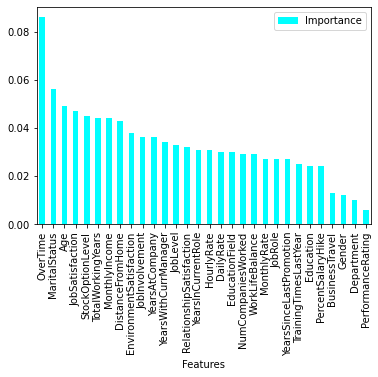

In [59]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

# Training the Model

LogisticRegression()
Accuracy Score of LogisticRegression() is: 83.42318059299191
Cross Validation Score are : [0.78247734 0.80060423 0.81570997 0.79154079 0.78247734 0.78549849
 0.81515152]
Cross Validation Score: 81.57099697885197
Accuracy Score - CV_Score 1.8521836141399461
[[296  65]
 [ 58 323]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       361
           1       0.83      0.85      0.84       381

    accuracy                           0.83       742
   macro avg       0.83      0.83      0.83       742
weighted avg       0.83      0.83      0.83       742

AUC Score of  LogisticRegression() is 0.8338568136046705


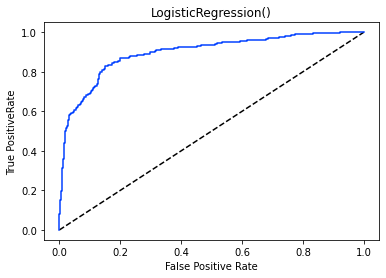



-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 73.98921832884096
Cross Validation Score are : [0.68882175 0.77643505 0.72507553 0.6978852  0.72205438 0.73111782
 0.75454545]
Cross Validation Score: 77.64350453172206
Accuracy Score - CV_Score -3.654286202881096
[[266  95]
 [ 98 283]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       361
           1       0.75      0.74      0.75       381

    accuracy                           0.74       742
   macro avg       0.74      0.74      0.74       742
weighted avg       0.74      0.74      0.74       742

AUC Score of  GaussianNB() is 0.7398121287470645


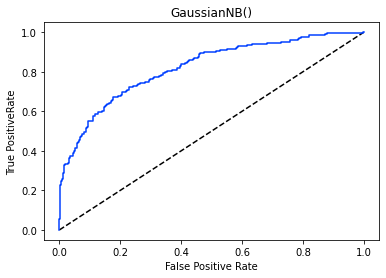



-------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy Score of DecisionTreeClassifier() is: 84.77088948787062
Cross Validation Score are : [0.67975831 0.83383686 0.91238671 0.92749245 0.88519637 0.9244713
 0.91818182]
Cross Validation Score: 92.74924471299094
Accuracy Score - CV_Score -7.978355225120325
[[301  60]
 [ 53 328]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       361
           1       0.85      0.86      0.85       381

    accuracy                           0.85       742
   macro avg       0.85      0.85      0.85       742
weighted avg       0.85      0.85      0.85       742

AUC Score of  DecisionTreeClassifier() is 0.8473437011509297


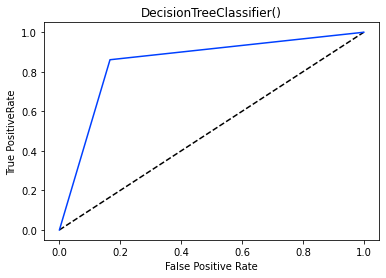



-------------------------------------------------------------------------------
KNeighborsClassifier()
Accuracy Score of KNeighborsClassifier() is: 81.26684636118598
Cross Validation Score are : [0.78247734 0.81873112 0.83383686 0.79456193 0.80966767 0.80664653
 0.7969697 ]
Cross Validation Score: 83.38368580060424
Accuracy Score - CV_Score -2.116839439418257
[[229 132]
 [  7 374]]
              precision    recall  f1-score   support

           0       0.97      0.63      0.77       361
           1       0.74      0.98      0.84       381

    accuracy                           0.81       742
   macro avg       0.85      0.81      0.81       742
weighted avg       0.85      0.81      0.81       742

AUC Score of  KNeighborsClassifier() is 0.8079881635294203


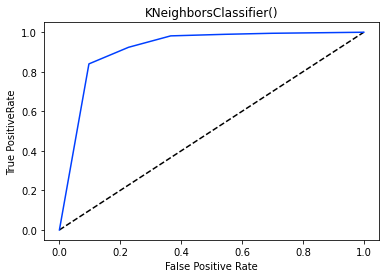



-------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy Score of RandomForestClassifier() is: 94.20485175202157
Cross Validation Score are : [0.73111782 0.87915408 0.9939577  0.97885196 0.97280967 0.99093656
 0.98787879]
Cross Validation Score: 99.39577039274926
Accuracy Score - CV_Score -5.190918640727688
[[356   5]
 [ 38 343]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       361
           1       0.99      0.90      0.94       381

    accuracy                           0.94       742
   macro avg       0.94      0.94      0.94       742
weighted avg       0.95      0.94      0.94       742

AUC Score of  RandomForestClassifier() is 0.9432060258395678


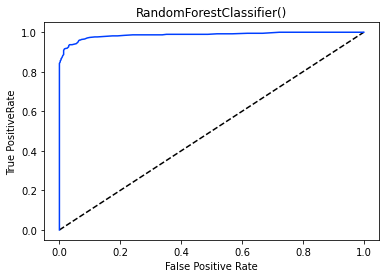



-------------------------------------------------------------------------------
SVC(kernel='poly', probability=True)
Accuracy Score of SVC(kernel='poly', probability=True) is: 90.70080862533693
Cross Validation Score are : [0.91540785 0.9244713  0.94561934 0.92749245 0.9305136  0.92145015
 0.92727273]
Cross Validation Score: 94.5619335347432
Accuracy Score - CV_Score -3.8611249094062714
[[310  51]
 [ 18 363]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       361
           1       0.88      0.95      0.91       381

    accuracy                           0.91       742
   macro avg       0.91      0.91      0.91       742
weighted avg       0.91      0.91      0.91       742

AUC Score of  SVC(kernel='poly', probability=True) is 0.9057408336423322


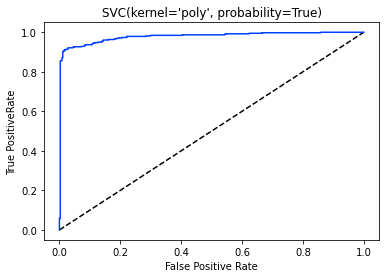



-------------------------------------------------------------------------------
ExtraTreesClassifier()
Accuracy Score of ExtraTreesClassifier() is: 96.09164420485176
Cross Validation Score are : [0.90936556 0.9305136  0.98791541 0.97885196 0.98489426 0.98489426
 0.98787879]
Cross Validation Score: 98.79154078549848
Accuracy Score - CV_Score -2.6998965806467226
[[353   8]
 [ 21 360]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       361
           1       0.98      0.94      0.96       381

    accuracy                           0.96       742
   macro avg       0.96      0.96      0.96       742
weighted avg       0.96      0.96      0.96       742

AUC Score of  ExtraTreesClassifier() is 0.9613606124719175


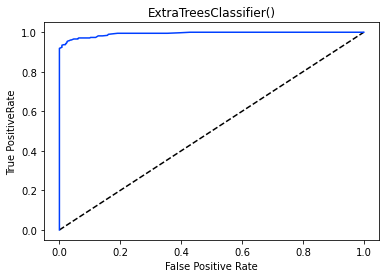



-------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=F

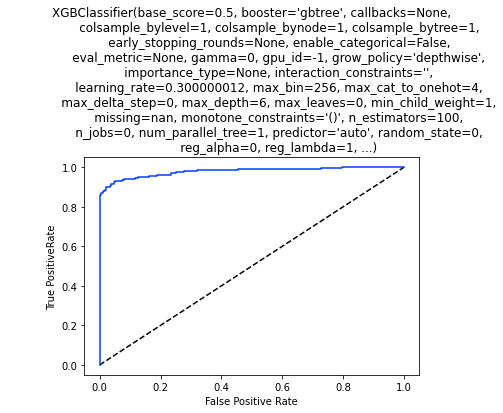



-------------------------------------------------------------------------------
LGBMClassifier()
Accuracy Score of LGBMClassifier() is: 94.33962264150944
Cross Validation Score are : [0.64652568 0.88821752 0.97280967 0.97583082 0.96978852 0.98489426
 0.98181818]
Cross Validation Score: 98.48942598187311
Accuracy Score - CV_Score -4.149803340363675
[[353   8]
 [ 34 347]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       361
           1       0.98      0.91      0.94       381

    accuracy                           0.94       742
   macro avg       0.94      0.94      0.94       742
weighted avg       0.95      0.94      0.94       742

AUC Score of  LGBMClassifier() is 0.9443002450178491


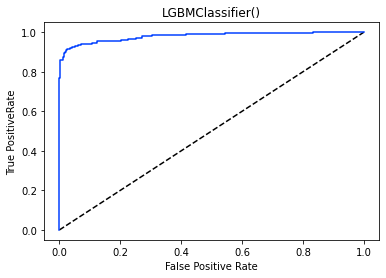



-------------------------------------------------------------------------------


In [60]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    
    y_pred_prob = m.predict_proba(x_test)[:,-1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("AUC Score of ",m,"is",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    plt.title(m)
    plt.show()
    print('\n')
    print('-------------------------------------------------------------------------------')

lets plot a performance table:

In [61]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[83.42,73.98,84.90,81.26,93.8,90.7,97.16,93.53,94.33],
                                 "Cv Score":[81.57,77.64,93.93,83.38,99.39,94.56,99.39,97.88,98.48],
                                 "Result":[1.85,-3.65,-9.03,-2.11,-5.59,-3.86,-2.22,-4.35,-4.14],
                                 "AUC Score":[0.83,0.73,0.84,0.80,0.93,0.90,0.97,0.93,0.94]})

Performance_table

Model  Accuracy_score  Cv Score  Result  AUC Score
0    LR           83.42     81.57    1.85       0.83
1   GNB           73.98     77.64   -3.65       0.73
2   DTC           84.90     93.93   -9.03       0.84
3   KNC           81.26     83.38   -2.11       0.80
4   RFC           93.80     99.39   -5.59       0.93
5   SVC           90.70     94.56   -3.86       0.90
6   ETC           97.16     99.39   -2.22       0.97
7   XGB           93.53     97.88   -4.35       0.93
8  LGBM           94.33     98.48   -4.14       0.94

In [62]:
# Chosing ETC

# Hypertuning Parameter 

In [63]:
param = {'n_estimators':[10,50,60,100],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[2,4,8],'min_samples_split':[2,5,8],
        'max_features':['sqrt', 'log2','auto',None]} 

# refering parameter from sklearn google document

In [64]:
GCV = GridSearchCV(ExtraTreesClassifier(), param, cv=8)


In [65]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=8, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8],
                         'max_features': ['sqrt', 'log2', 'auto', None],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 50, 60, 100]})

In [66]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 50}

In [67]:
GCV.best_score_

0.9065931575675956

# Final Model

In [68]:
final_model = ExtraTreesClassifier(criterion= 'gini',max_depth =8, max_features='log2', min_samples_split=2,n_estimators=60)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.64420485175202


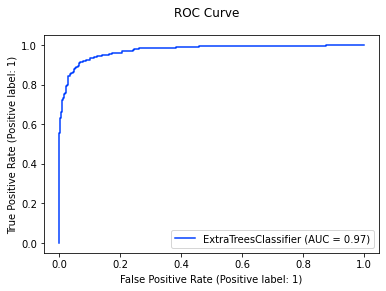

In [69]:
# visualization of final model
roc = metrics.plot_roc_curve(final_model, x_test, y_test)
roc.figure_.suptitle("ROC Curve")
plt.show()

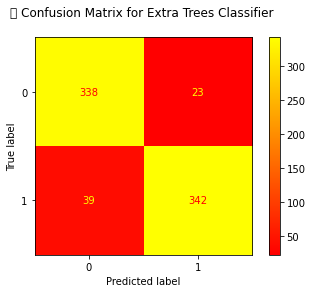

In [70]:
#plotting confusion matrix
names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='autumn')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the orange boxes)

# Saving the model

In [71]:
# saving model using joblib
file = "HR_Analytics_E03.pkl"
joblib.dump(final_model, file)

['HR_Analytics_E03.pkl']

# Thank you for evaluating my project